## Homework 3
### Patricia Llull Sperandio

# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
energyDF = pd.read_csv("energy.csv", header=0)

### Calculate the following

#### Shape

In [3]:
shape= energyDF.shape 
print(f"there are {shape[0]} rows and {shape[1]} columns in the dataframe")

there are 8737 rows and 9 columns in the dataframe


#### Create a list called "features" containing all the columns that are not "datetime"

In [4]:
# use filter or list comprehensions or for loops or dark magic

columns_list =list(energyDF.columns.values)
features=[column for column in columns_list if 'datetime' not in column]

print(f"List of features: {features}")

##alternative with a function: 
#columns_list = energyDF.columns.values.tolist()

#def remove_date(list_col):
 #   for column in list_col:
  #      if column == 'datetime':
   #         list_col.remove(column)
    #    return list_col
    
#remove_date(columns_list)
#columns_list

List of features: ['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


#### How many NaN are there in the dataset?

In [5]:
# "Dealing with missing values" in the slides

a=energyDF.isna().sum()
print(f"There are {a.sum()} NA's in the dataset") #equivalent to energyDF.isna().sum().sum()


There are 2541 NA's in the dataset


#### Convert the "datetime" column into a Series containing datetime objects

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [6]:
# pandas datetime functionalities
energyDF['datetime'] = pd.to_datetime(energyDF['datetime'], utc=True)
type(energyDF['datetime']) #check it's a series - okie

pandas.core.series.Series

#### Create the following columns
* year
* month
* day
* hour
* weekday

In [7]:
# pandas datetime functionalities
energyDF["year"] = energyDF["datetime"].dt.year
energyDF["month"] = energyDF["datetime"].dt.month
energyDF["day"] = energyDF["datetime"].dt.day
energyDF["hour"] = energyDF["datetime"].dt.hour
energyDF["weekday"] = energyDF["datetime"].dt.weekday

print(f"This is the new list of columns: {energyDF.columns.values.tolist()}.")

This is the new list of columns: ['datetime', 'power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price', 'year', 'month', 'day', 'hour', 'weekday'].


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... 

In [8]:
# feature engineering: use your already beloved (map + lambda functions) or list comprehensions

energyDF["weekend"] = energyDF["weekday"].map(lambda x: x>4).astype(int) #energyDF["weekday"] starts at 0!! so Sat/Sun = 5&6

energyDF[energyDF["weekend"] ==1] #check if there are one's

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend
97,2019-01-05 00:00:00+00:00,25775.6,6110.0,3156.6,NaN,3486.4,3605.0,2336.5,69.50,2019,1,5,0,5,1
98,2019-01-05 01:00:00+00:00,24194.2,6110.0,2594.3,NaN,2461.3,3489.9,2421.4,68.07,2019,1,5,1,5,1
99,2019-01-05 02:00:00+00:00,23382.7,6110.0,2337.4,NaN,2089.2,3444.1,2628.5,66.00,2019,1,5,2,5,1
100,2019-01-05 03:00:00+00:00,23078.1,6110.0,2488.5,NaN,1653.2,3256.5,2878.7,63.93,2019,1,5,3,5,1
101,2019-01-05 04:00:00+00:00,22835.2,6110.0,2366.0,NaN,1358.3,3266.2,3169.8,62.00,2019,1,5,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,2019-12-29 19:00:00+00:00,28772.6,7103.5,3994.1,0.1,8020.5,430.0,2025.4,40.00,2019,12,29,19,6,1
8709,2019-12-29 20:00:00+00:00,28829.4,7104.5,3845.9,NaN,7775.8,425.0,2026.8,41.15,2019,12,29,20,6,1
8710,2019-12-29 21:00:00+00:00,27649.0,7103.5,3808.2,NaN,7397.3,425.0,2055.0,39.06,2019,12,29,21,6,1
8711,2019-12-29 22:00:00+00:00,25885.3,7106.4,3509.7,NaN,6954.4,412.0,1983.1,34.90,2019,12,29,22,6,1


#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [9]:
# features is the list you created in the beginning
# we are going to use the list to apply the average calc (average power demand) & using weekday column

    #groupby["weekday"] & mean() for features

energyDF["weekday"].nunique() # we have 7 days a week - okie

average_values = energyDF.groupby(["weekday"]).mean()[features] #apply only to features within the list created earlier
average_values

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object
Use that function to create a "season" column

In [10]:
from datetime import date, datetime

def get_season(date_to_convert):
    year = date_to_convert.year
    seasons = [
        ("winter", date(year, 12, 21), date(year, 12, 31)),
        ("summer", date(year, 6, 21), date(year, 9, 20)),
        ("fall", date(year, 9, 21), date(year, 12, 20)),
        ("winter", date(year, 1, 1), date(year, 3, 20)),
        ("spring", date(year, 3, 21), date(year, 6, 20))
    ]
    
    for season in seasons:
        if date_to_convert>=season[1] and date_to_convert<=season[2]:
            return season[0]
        
energyDF["season"] = energyDF["datetime"].map(get_season)
        
energyDF[energyDF["year"]==2018]

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,0,winter


#### Calculate average demand and spot_price for each season

In [11]:
features_for_seasons = [column for column in columns_list if 'power_demand' in column or 'spot_price' in column]
seasonal_pricesDF = energyDF.groupby(["season"]).mean().round(2)[features_for_seasons]
seasonal_pricesDF

,power_demand,spot_price
season,,
fall,28212.96,43.51
spring,27112.77,48.81
summer,29269.89,46.60
winter,29482.94,52.00


#### Why are there so many NaN values in the "solar" column?

### answer
There are many Na's in the column "solar" because the production is dependent time of day and weather. The production stops at night (output is 0) and production is smaller if it is cloudy or rainy. The variation across seasons is not huge, and that's because there can be sunny days in any season.

In [12]:
energyDF[energyDF["solar"].isna()]

#count the number of NA's in winter vs. summer
winterDF = energyDF[energyDF["season"]=='winter']
winterDF.isna().sum()

summerDF= energyDF[energyDF["season"]=="summer"]
summerDF.isna().sum()

datetime          0
power_demand      0
nuclear           0
gas               0
solar           624
hydro             0
coal              0
wind              0
spot_price        0
year              0
month             0
day               0
hour              0
weekday           0
weekend           0
season            0
dtype: int64

#### Calculate the total income for each type of power generation and total costs for consumption
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [13]:
# Income = energy_generated * price
# Cost = energy_bought * price

#income nuclear = sum of (row nuclear* spot_price that day) for all rows 
income = {}
features_list_2= ["power_demand","nuclear","gas","solar", "hydro","coal","wind"]
features_new = [element for element in features if 'spot_price' not in element]
for element in features_new:
    income[element] = np.sum(energyDF[element] * energyDF["spot_price"]).round(2)
income


{'power_demand': 12115827296.22,
 'nuclear': 2674992442.17,
 'gas': 2577997502.64,
 'solar': 430157479.78,
 'hydro': 1179143190.7,
 'coal': 591516973.36,
 'wind': 2412917661.56}

#### Create two plots: 
* Hourly average power demand
* Hourly average spot price

In [14]:
average_demands = energyDF.groupby(['hour']).mean() [[column for column in columns_list if 'power_demand' in column or 'spot_price' in column]]
average_demands
#or: average_demands = energyDF.groupby(['hour']).mean() [['power_demand','spot_price']]


,power_demand,spot_price
hour,,
0,23642.097527,43.228049
1,22853.982692,41.596648
2,22526.803846,40.770907
3,22637.725275,41.056181
4,23720.157692,42.676758
5,25701.133242,45.745549
6,28009.612088,49.126511
7,29780.119780,50.587115
8,31020.076374,50.875495


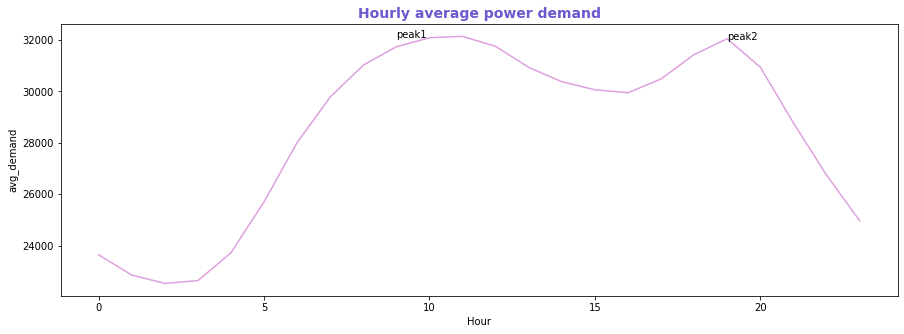

I know most of the stuff here is not necessary, I just wanted to try to add things to the graph!!


In [29]:
#AVERAGE POWER DEMAND
average_demands = energyDF.groupby(['hour']).mean() [['power_demand','spot_price']]
index=average_demands.index #to get the hours 
plt.figure(figsize=(15,5))
plt.plot(index, average_demands['power_demand'], color='plum')
plt.title("Hourly average power demand", color= 'slateblue', fontweight='bold', fontsize=14)
plt.text(9,32067, "peak1")
plt.text(19, 32000, "peak2")
plt.xlabel("Hour")
plt.ylabel("avg_demand")
plt.show()
##or (from notebook data_analysis_case): energyDF.groupby('hour').mean()['power_demand'].plot(figsize=(15,4))


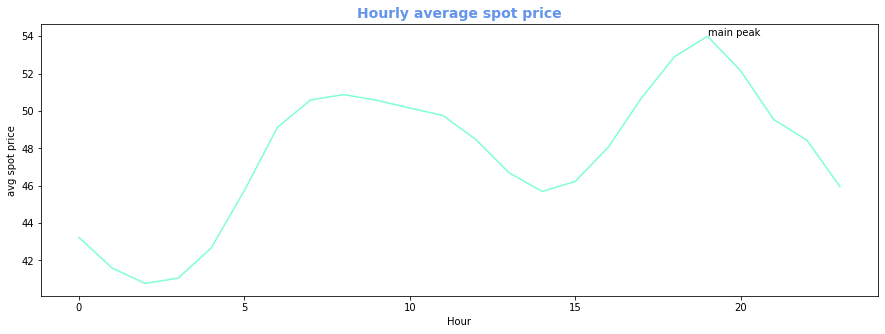

In [28]:
#AVERAGE SPOT PRICE

plt.figure(figsize=(15,5))
plt.plot(index, average_demands['spot_price'], 'aquamarine')
plt.title("Hourly average spot price", color = 'cornflowerblue', fontweight= 'bold', fontsize=14)
plt.xlabel("Hour")
plt.ylabel("avg spot price")
plt.text(19,54,"main peak")
plt.show()

#### Create a categorical variable called "wind_category" using the "wind" column
Create 3 categories: low, mid, high

In [17]:
categories = ['low','medium','high']
energyDF['wind_category'] = pd.cut(energyDF['wind'], bins=3, labels=categories)
#energyDF[energyDF['wind_category'] =='high'] 

#### Which is the power generation type that has generated the most energy? And the least?

In [18]:
generation_types = ['nuclear','gas','solar','hydro','coal','wind'] #create a list of power types
generation = energyDF[[column for column in generation_types]] #get a miniDF with just these columns
sums = generation.sum(axis=0,skipna=True) #make sum for all rows in a column, for all columns

In [19]:
max_prod= sums.idxmax()

print(f"The power geneation type that has generated most energy is {max_prod}. This is probably because plants operate continuously.")

The power geneation type that has generated most energy is nuclear. This is probably because plants operate continuously.


In [20]:
min_prod=sums.idxmin()
print(f"The power type that generated the least energy is {min_prod}. This might be due to the fact that it is harder to 'control' solar power production")

The power type that generated the least energy is solar. This might be due to the fact that it is harder to 'control' solar power production
